# Kruskal–Wallis one-way analysis of variance

- The Kruskal–Wallis test by `ranks`, `Kruskal–Wallis H test` (named after William Kruskal and W. Allen Wallis), or `one-way ANOVA on ranks` is `a non-parametric method` for testing whether samples originate from the same distribution.


- It is used for comparing two or more independent samples of equal or different sample sizes. 


- It extends the Mann–Whitney U test, which is used for comparing only two groups. The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA).


- A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample.

- The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic dominance obtains. 


- For analyzing the specific sample pairs for stochastic dominance, Dunn's test, pairwise Mann–Whitney tests with Bonferroni correction, or the more powerful but less well known Conover–Iman test are sometimes used.


- Since it is a nonparametric method, the Kruskal–Wallis test does not assume a normal distribution of the residuals, unlike the analogous one-way analysis of variance. 
- If the researcher can make the assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group. Otherwise, it is impossible to say, whether the rejection of the null hypothesis comes from the shift in locations or group dispersions. This is the same issue that happens also with the Mann-Whitney test.

# Method

1. Rank all data from all groups together; i.e., rank the data from 1 to N ignoring group membership. Assign any tied values the average of the ranks they would have received had they not been tied.

2. test statistic
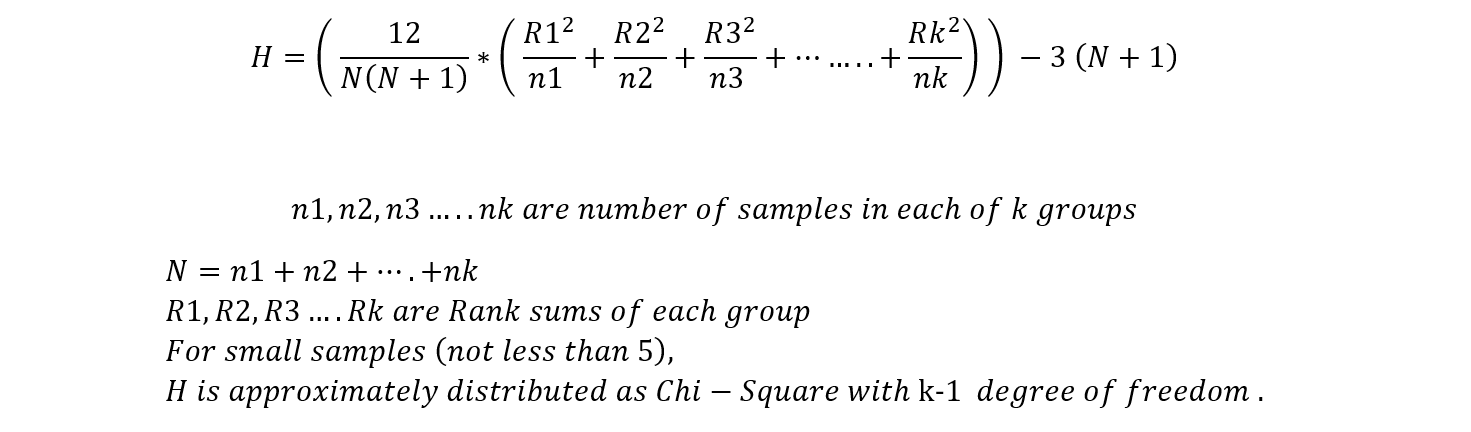


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t


In [49]:
data = pd.read_csv("walmart_data-Copy1.txt")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [50]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [51]:
data["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [52]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [53]:
age_18_25 = data[data["Age"]=="18-25"]["Purchase"]
age_46_50 = data[data["Age"]=="46-50"]["Purchase"]
age_51_55 = data[data["Age"]=="51-55"]["Purchase"]

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

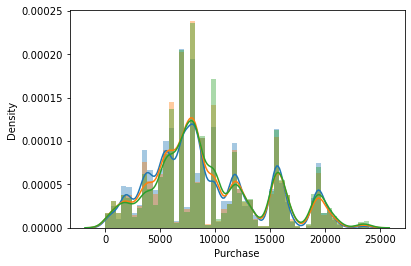

In [82]:
sns.distplot(age_18_25)
sns.distplot(age_46_50)
sns.distplot(age_51_55)

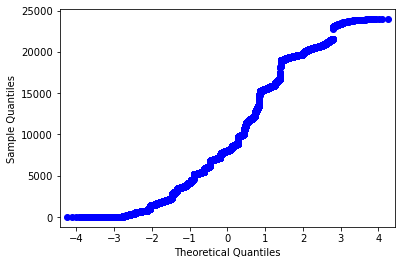

In [86]:
sm.qqplot(age_18_25)
plt.show()

since the assumptions for anova breaks down , we can do Kruskal Wallis one way anova test to see if groups are from same distribution  

    H0 : purchase power is same across 3 age groups
    Ha : purchase power is different 

In [54]:
age_51_55.mean(),age_46_50.mean(),age_18_25.mean()

(9534.808030960236, 9208.625697468327, 9169.663606261289)

In [55]:
age_51_55.median(),age_46_50.median(),age_18_25.median()

(8130.0, 8036.0, 8027.0)

In [56]:
test_data  = data.loc[data["Age"].isin(['18-25','46-50', '51-55'])]

In [57]:
test_data = test_data[["Age","Purchase"]]

In [58]:
test_data.sample(10)

,Age,Purchase
362078,18-25,6951
85784,18-25,4528
27417,46-50,15367
410329,18-25,6899
217274,18-25,8827
182355,18-25,8892
402532,46-50,6933
163204,51-55,10020
307885,18-25,7156
121071,18-25,11070


### Ranking :

In [59]:
test_data["rank"] = test_data["Purchase"].rank()

In [60]:
test_data

,Age,Purchase,rank
6,46-50,19215,172905.0
7,46-50,15854,161400.5
8,46-50,15686,157934.0
14,51-55,5378,41356.0
15,51-55,2079,10636.5
...,...,...,...
550043,46-50,48,364.0
550052,46-50,239,803.0
550062,46-50,473,1307.5
550063,51-55,368,1073.0


In [61]:
test_data.groupby("Age")["rank"].sum()

Age
18-25    9.047474e+09
46-50    4.191472e+09
51-55    3.663763e+09
Name: rank, dtype: float64

### Rank sum per group

In [62]:
rank_sum =  test_data.groupby("Age")["rank"].sum()
rank_sum

Age
18-25    9.047474e+09
46-50    4.191472e+09
51-55    3.663763e+09
Name: rank, dtype: float64

### number of observations per group

In [63]:
ni = test_data.groupby("Age")["rank"].count()
ni

Age
18-25    99660
46-50    45701
51-55    38501
Name: rank, dtype: int64

### Total numbers of observations across all groups

In [64]:
N = np.sum(test_data.groupby("Age")["rank"].count())
N

183862

### Degree of freedom

In [65]:
df = test_data["Age"].nunique()-1
df

2

###  Calculating H : 

In [66]:
12/(N*(N+1))

3.549726756342654e-10

In [67]:
np.sum((rank_sum**2)/ni)

1554426293408263.5

In [68]:
3*(N+1)

551589

In [69]:
(12/(N*(N+1)))*(np.sum((rank_sum**2)/ni))

551778.860447385

In [72]:
H = (12/(N*(N+1)))*(np.sum((rank_sum**2)/ni))-(3*(N+1))
H

189.86044738499913

### H critical Value

In [76]:
Hcritical = stats.chi2.ppf(0.95,df)
Hcritical

<IPython.core.display.Javascript object>

5.991464547107979

### p_value

In [77]:
p_value = 1-stats.chi2.cdf(H,df)
p_value

<IPython.core.display.Javascript object>

0.0


## testing using scipy library : 

In [71]:
stats.kruskal(age_18_25,age_46_50,age_51_55)

<IPython.core.display.Javascript object>

KruskalResult(statistic=189.8604527526935, pvalue=5.920065596966331e-42)

In [79]:
p_value < 0.05
    

True

Reject Null Hypothesis that all those age groups comes from the same distribution of purchase. 


    so , we can conclude that purchase power is different across given age groups. 